## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### 动态规划

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [3]:
from collections import defaultdict

In [4]:
price_obj = defaultdict(int) # 初始化价格的obj

In [122]:
for (i, p) in enumerate(original_price): # 循环已知数组得到价格的obj, 注意key需要加1，因为是从1开始的
    price_obj[i+1] = p

$r(n) = max(p_n, r(1)+r(n-1), r(2)+r(n-2),...,r(n-1)+r(1))$

In [123]:
def r(n): # 根据以上等式得到的r(n)的递归函数
    return max([price_obj[n]] + [r(i) + r(n-i) for i in range(1,n)])

In [124]:
r(12) # 可以得到结果，但是比较慢，而且数据越大越难计算

36

##### 动态规划，考虑改变r(n)函数

方法一：利用装饰器和缓存变量

In [125]:
from functools import wraps

1. 装饰器简单例子

In [126]:
def decoration_example(f): # 装饰器的简单例子
    @wraps(f)
    def wrap(n):
        print('I\'m a wrapper')
        return f(n)
    return wrap

In [127]:
@decoration_example # @语法糖，相当于sum_10 = decoration_example(sum_10)
def sum_10(n):
    return n + 10
sum_10(100)

I'm a wrapper


110

2. 利用装饰器原理重写r(n)

In [128]:
def price_using_memory_decoration(f): # 加个缓存solutions，计算过的f会存在solutions里
    solutions = {}
    @wraps(f)
    def wrap(n):
        if n in solutions:
            return solutions[n]
        else:
            solutions[n] = f(n)
            return f(n)
    return wrap

In [129]:
@price_using_memory_decoration # 语法糖
def r(n):
    return max([price_obj[n]] + [r(i)+r(n-i) for i in range(1,n)])

In [130]:
r(38) # 因为用到了装饰器和缓存，所以计算时间大幅缩小

118

3. 动态规划，计算最佳结果的分配方法

In [154]:
solution_splits = defaultdict(set)

In [162]:
@price_using_memory_decoration # 语法糖
def r_splits(n):
    list_ = [((0,n), price_obj[n])] + [((i,n-i), r_splits(i) + r_splits(n-i)) for i in range(1,n)]
    splits, p = max(list_, key = lambda x: x[1])
    solution_splits[n] = splits
    return p

In [163]:
def parse_solution(n):
    if solution_splits[n][0] == 0:
        return [solution_splits[n][1]]
    return parse_solution(solution_splits[n][0]) + parse_solution(solution_splits[n][1])

In [168]:
r_splits(234)

743

In [169]:
parse_solution(234)

[3,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [157]:
from functools import wraps

In [158]:
def distance_decoration(f):
    memory = {}
    @wraps(f)
    def wrap(s1, s2):
        if (s1,s2) in memory:
            return memory[(s1,s2)]
        else:
            memory[(s1,s2)] = f(s1, s2)
            return f(s1, s2)
    return wrap

In [159]:
solution = {}
@distance_decoration
def distance(string1, string2): # edit distance函数
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    candidates = [
        (distance(string1[:-1], string2) + 1, 'DEL {}'.format(string1[-1] + '_' + str(len(string1)-1))),
        (distance(string1, string2[:-1]) + 1, 'ADD {}'.format(string2[-1] + '_' + str(len(string2)-1)))
    ]
    if string1[-1] == string2[-1]:
        candidates.append((distance(string1[:-1], string2[:-1]), ''))
    else:
        candidates.append((distance(string1[:-1], string2[:-1]) + 1, 'REPLACE {}=>{}'.format(string1[-1]+ '_' + str(len(string1)-1), string2[-1])))
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    solution[(string1, string2)] = operation
    return min_distance

def parse_solution(str1, str2): # edit distance显示各步步骤
    if len(str1) == 0:
        arr = []
        for (idx,i) in enumerate(str2[::-1]):
            arr.append('ADD {}'.format(i + '_' + str(len(str2) - 1 - idx)))
        return arr
    if len(str2) == 0:
        arr = []
        for (idx,i) in enumerate(str1[::-1]):
            arr.append('DELETE {}'.format(i + '_' + str(len(str1) - 1 - idx)))
        return arr
    operation_text = solution[(str1, str2)]
    operation = operation_text.split(' ')[0]
    if operation == 'ADD':
        return [operation_text] + parse_solution(str1, str2[:-1]) 
    elif operation == 'DEL':
        return [operation_text] + parse_solution(str1[:-1], str2)
    elif operation == 'REPLACE':
        return [operation_text] + parse_solution(str1[:-1], str2[:-1])
    else:
        return parse_solution(str1[:-1], str2[:-1])

In [160]:
d = distance('dcfdg', 'g')
parse_solution('dcfdg', 'g')

['DELETE d_3', 'DELETE f_2', 'DELETE c_1', 'DELETE d_0']

In [161]:
distance('bei', 'bie')
parse_solution('bei', 'bie')

['DEL i_2', 'ADD i_1']

In [162]:
distance( 'bie','bei')
parse_solution( 'bie','bei')

['DEL e_2', 'ADD e_1']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [16]:
import random
import math
import matplotlib.pylab as plt

In [17]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

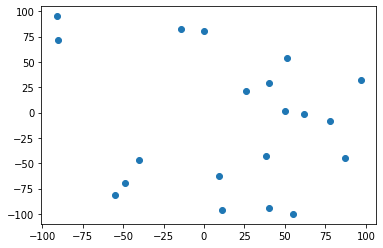

In [18]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [19]:
chosen_p = (-50, 10)

In [20]:
import matplotlib.pyplot as plt

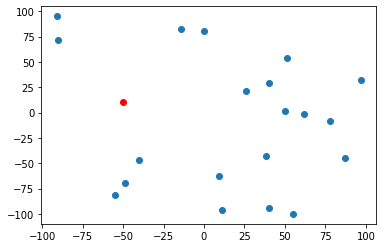

In [21]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [22]:
class Travelling:
    def __init__(self, lat, long, start_node):
        self.points = [start_node] + [(x,y) for (x,y) in zip(lat, long)]
        self.start_node = start_node
        self.solutionArr = [[(0,0)] * (2**(len(self.points)-1)) for i in range(len(self.points))]
    def parseSetToNum(self, sets):
        res = 0
        for s in sets:
            res += 2**(s-1)
        return res
    def getDistance(self, p1, p2):
        return math.sqrt((p2[0]- p1[0])**2 + (p2[1] - p1[0])**2)
    def tsp(self):
        s = self.start_node
        cities = list(range(1, len(self.points))) # start_node是第0点
        return self.resolve(s, cities)
    def resolve(self, start, nodeIndexes):
        if(len(nodeIndexes) == 0):
            return self.getDistance(start, self.start_node)
        nodesNum = self.parseSetToNum(nodeIndexes)
        sIndex = self.points.index(start)
        if self.solutionArr[sIndex][nodesNum][0] != 0:
            return self.solutionArr[sIndex][nodesNum][0]
        candidates = []
        for (index,i) in enumerate(nodeIndexes):            
            copy = nodeIndexes[:]
            copy.pop(index)
            candidates.append((self.getDistance(start, self.points[i]) + self.resolve(self.points[i], copy), i))
        d,next_node = min(candidates, key=lambda x: x[0])
        self.solutionArr[self.points.index(start)][self.parseSetToNum(nodeIndexes)] = (d, next_node)
        return d

In [26]:
l1 = latitudes[:3] # 电脑配置问题，只取三个点验证
l2 = longitude[:3]
t = Travelling(l1, l2, chosen_p)
t.tsp()

226.493883765879

In [51]:
lists = [t.start_node] + t.points
start = lists.index(t.start_node)
nodes = list(range(len(lists)))
arr = [start] # 所有经过点的数组按先后顺序的集合(为下面可视化做准备)
def not_zeros(indexes):
    for i in indexes:
        if i != 0:
            return True
    return False
while not_zeros(nodes):
    nodes[start] = 0
    copy = nodes[:]
    copy_ =[s for s in copy if s != 0]
    next_node = t.solutionArr[start][t.parseSetToNum(copy_)][1]
    arr.append(next_node)   
    start = next_node
arr

[0, 3, 1, 2, 0]

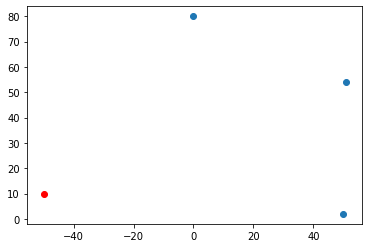

In [54]:
plt.scatter(l1, l2)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

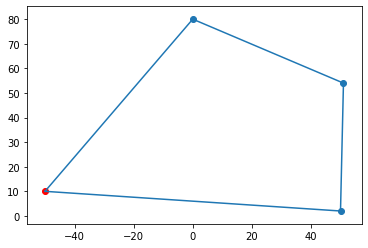

In [56]:
real_l1 = [lists[i][0] for i in arr]
real_l2 = [lists[i][1] for i in arr]
plt.plot(real_l1,real_l2)
plt.scatter(l1, l2)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

shuro